## 1 필요한 라이브러리 로드

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2 데이터셋 로드

In [41]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [6]:
df.head() #다 숫자로 되어있어서 전처리 불필요

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3 학습, 예측 데이터셋 나누기

In [40]:
#8:2의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count라는 변수에 담는다.
split_count = int(df.shape[0] * 0.8)
split_count

614

In [19]:
#train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count].copy()
train.shape

(614, 9)

In [29]:
test = df[split_count:].copy()
test.shape

(154, 9)

## 4 학습, 예측에 사용할 칼럼

In [39]:
#feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 5 정답값이자 예측해야 될 값

In [55]:
#label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = train.columns[-1]
label_name

'Outcome'

## 6 학습, 예측 데이터셋 만들기

In [50]:
#학습 세트 만들기 예) 시험의 기출문제
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [57]:
#정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
print(y_train.shape)
y_train.head()
#문제와 정답의 행의 개수가 같아야 함

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [60]:
#예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [64]:
#예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 7 머신러닝 알고리즘 가져오기

In [95]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

## 8 학습(훈련)

In [96]:
#시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 9 예측

In [97]:
#실전 시험문제(X_train)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

## 10 트리 알고리즘 분석하기

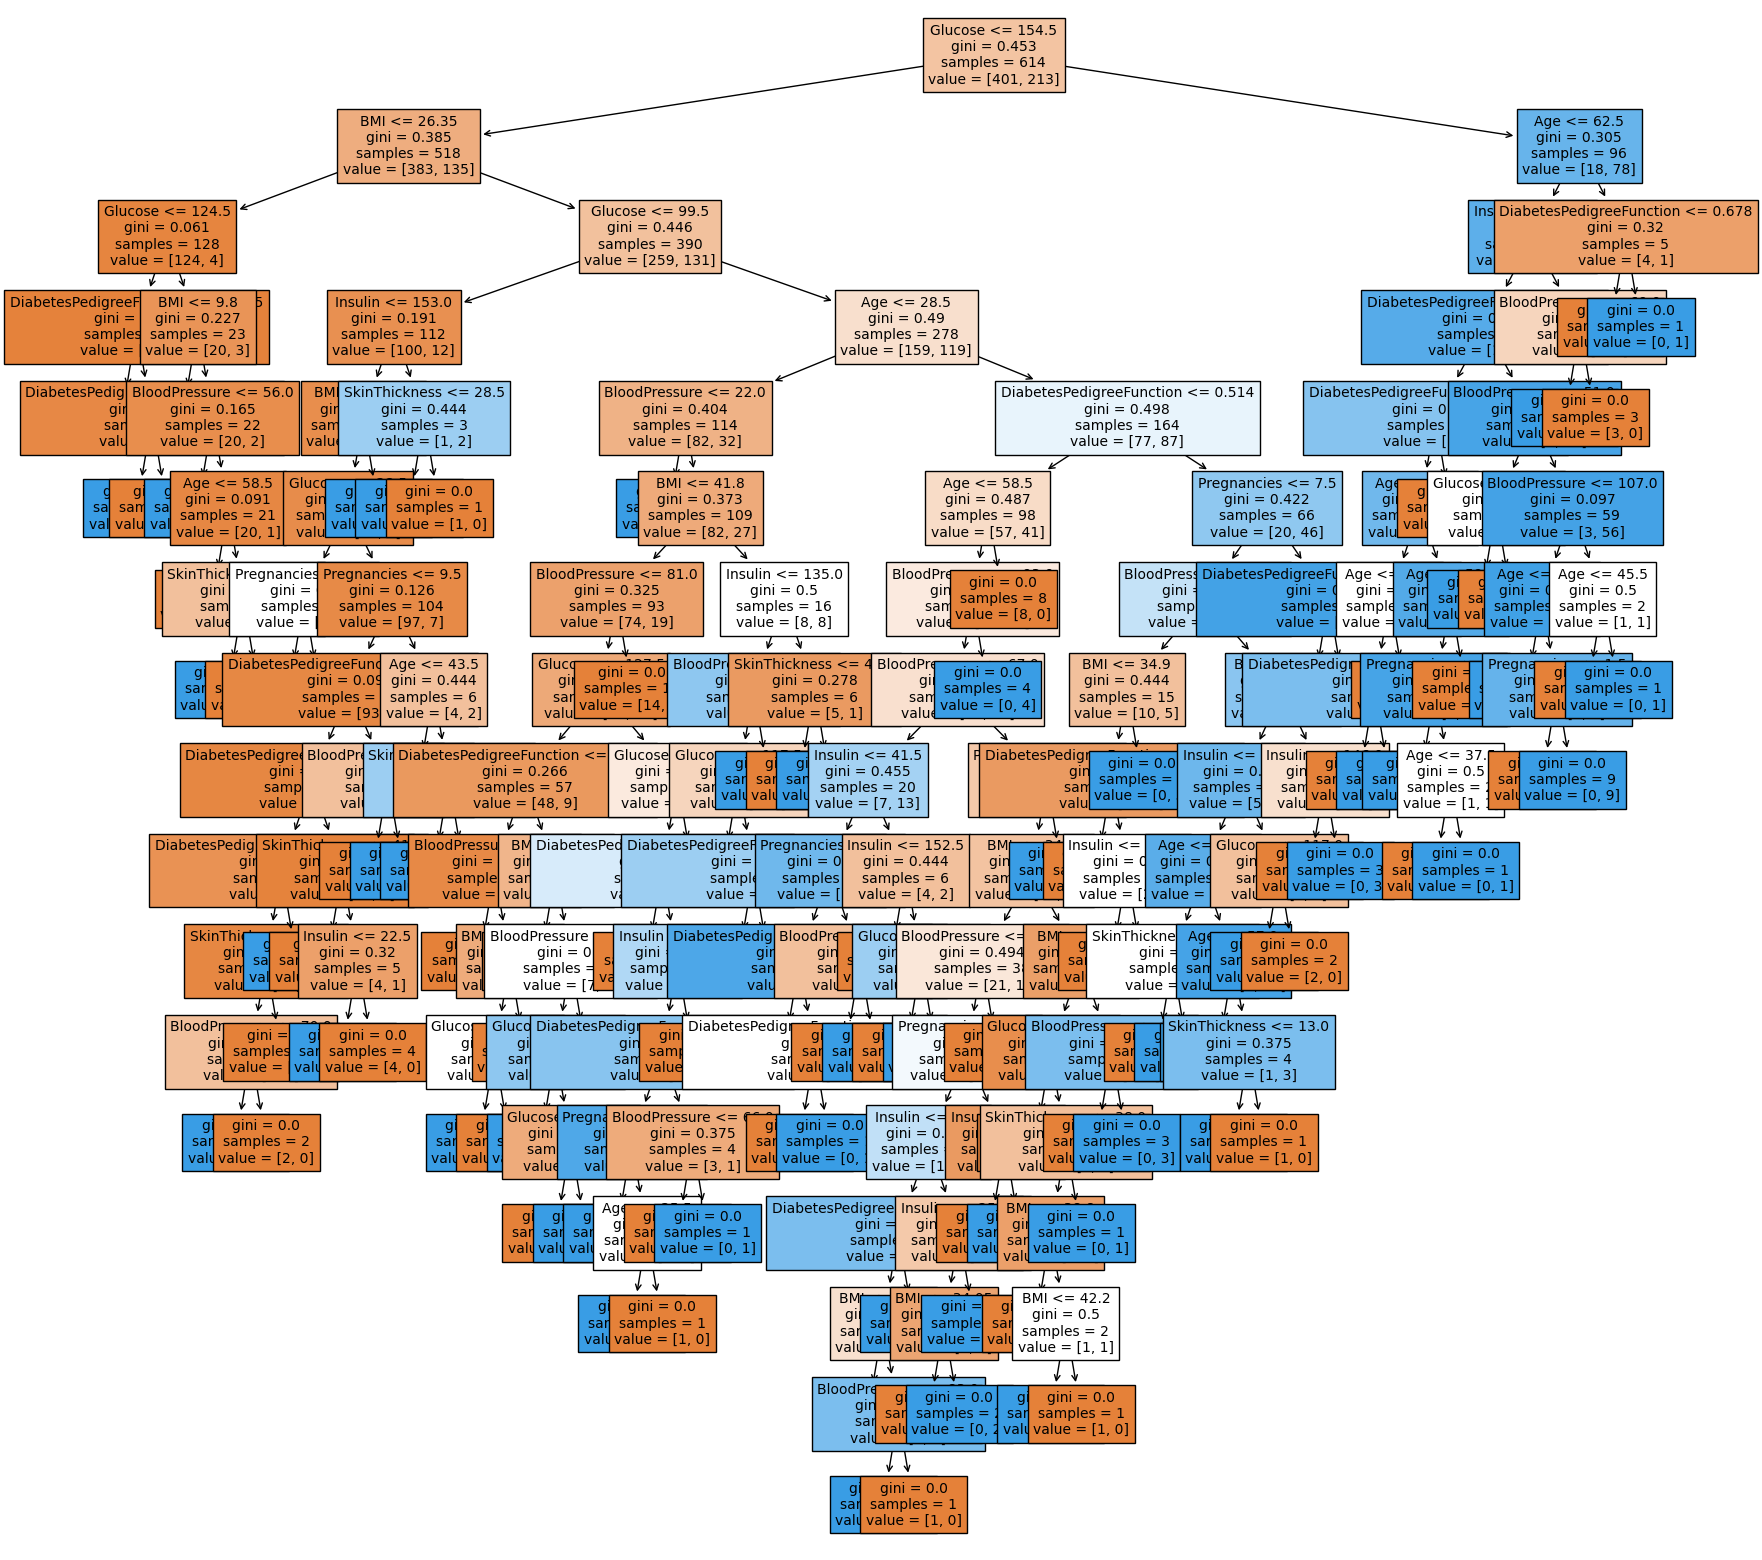

In [98]:
#의사결정나무를 시각화 합니다.
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

In [99]:
#피처의 중요도를 추출하기
model.feature_importances_

array([0.05944171, 0.30368248, 0.13140431, 0.04020035, 0.09010707,
       0.15739296, 0.12077948, 0.09699165])

<Axes: >

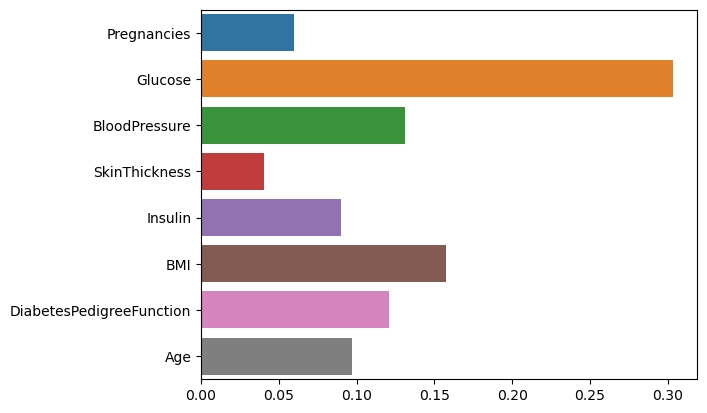

In [100]:
#피쳐의 중요도 시각화 하기, Glucose가 당뇨를 판단할 때 가장 중요
sns.barplot(x=model.feature_importances_, y=feature_names)

## 11 정확도(Accuracy) 측정하기

In [105]:
#실제값-예측값을 뺴주면 같은 값은 0으로 나오게 됩니다.
#여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.
diff_count = abs(y_test - y_predict).sum()
diff_count

44

In [108]:
#예측의 정확도를 구합니다. 100점 만점에 몇 점을 맞았는지 구한다고 보면 됩니다.
(len(y_test)-diff_count) / len(y_test) * 100

71.42857142857143

In [110]:
#위에서처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)*100

71.42857142857143

In [114]:
#model의 score로 점수를 계산합니다.
model.score(X_test, y_test) * 100

71.42857142857143